In [2]:
import tensorflow as tf

In [3]:
tf.debugging.set_log_device_placement(True)

In [4]:
# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU만 사용하도록 제한
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

In [7]:
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [8]:
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
#Bert로 전처리, 토큰화할 것이기 때문에 메캅 필요x
#!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash #colab사용자만 설치하시면 됩니다(Mecab)

# SBERT(참고용)

In [ ]:
pip install sentence_transformers

In [ ]:
import numpy as np
import pandas as pd
from numpy import dot
from numpy.linalg import norm
import urllib.request
from sentence_transformers import SentenceTransformer

In [ ]:
bert = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527 [00:00<?, ?B/s]

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/data/capstone/train.csv")
val = pd.read_csv("/content/drive/MyDrive/data/capstone/valid.csv")
test = pd.read_csv("/content/drive/MyDrive/data/capstone/test.csv")

In [ ]:
A = bert.encode('자연어 처리는 너무 재밌어')

In [ ]:
B = bert.encode('자연어 처리는 너무 재밌어')

In [ ]:
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [ ]:
cos_sim(A,B)

1.0

# BERT Modeling (실행하지말것)

In [ ]:
import torch

In [ ]:
pip install transformers==3.0.2

In [ ]:
!pip install ratsnlp

In [ ]:
from transformers import BertConfig,BertModel
pretrained_model_config = BertConfig.from_pretrained('beomi/kcbert-base')

model = BertModel.from_pretrained('beomi/kcbert-base',
                                  config=pretrained_model_config,)

Downloading:   0%|          | 0.00/619 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
import torch
from ratsnlp.nlpbook.classification import ClassificationTrainArguments

In [ ]:
args = ClassificationTrainArguments(
    pretrained_model_name = "beomi/kcbert-base",
    downstream_task_name = "pair-classification",
    downstream_corpus_name='FNC',
    downstream_model_dir='/gdrive/My Drive/nlpbook/checkpoint-paircls',
    batch_size=32 if torch.cuda.is_available() else 4,
    learning_rate = 5e-5,
    max_seq_length=64,
    epochs=5,
    tpu_cores=0 if torch.cuda.is_available() else 8,
    )

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/data/capstone/train.csv")
val = pd.read_csv("/content/drive/MyDrive/data/capstone/valid.csv")
test = pd.read_csv("/content/drive/MyDrive/data/capstone/test.csv")

In [ ]:
##Bert 토크나이저 (kcbert-base 모델)
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('beomi/kcbert-base',
                                          do_lower_case=False)

Downloading:   0%|          | 0.00/250k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/619 [00:00<?, ?B/s]

# Bert Processing

In [10]:
!pip install transformers==3.0.2

     |████████████████████████████████| 769 kB 1.4 MB/s            
     |████████████████████████████████| 880 kB 2.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 97 kB 2.2 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 288 kB 1.6 MB/s            
     |████████████████████████████████| 1.1 MB 1.4 MB/s            
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /var/folders/0y/sw67dqxs30d9l05l8m7j8kfm0000gn/T/tmpug1es3wf
       cwd: /private/var/folders/0y/sw67dqxs30d9l05l8m7j8kfm0000gn/T/pip-install-u8o_b2ll/tokenizers_f1fd4eafd0314ea3af7914c7271ec1e9
  Complete output (48 lines):


In [11]:
import os
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'transformers'

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS = 3
#MAX_LEN = 24 * 2 # Average total * 2
MAX_LEN = 250

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/data/capstone/train.csv")
val = pd.read_csv("/content/drive/MyDrive/data/capstone/valid.csv")
test = pd.read_csv("/content/drive/MyDrive/data/capstone/test.csv")

In [ ]:
from transformers import *

tokenizer = BertTokenizer.from_pretrained('beomi/kcbert-base',do_lower_case=False)

Downloading:   0%|          | 0.00/250k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

In [ ]:
def bert_tokenizer_v2(sent1, sent2, MAX_LEN):
    
    # For Two setenece input
    
    encoded_dict = tokenizer.encode_plus(
        text = sent1,  #title에 적용함
        text_pair = sent2,  #body에 적용함
        add_special_tokens = True, # add_special_tokens를 지정해주면 CLS,SEP를 붙여줌.
        max_length = MAX_LEN,           # 최대 길이에 문장을 맞추고,
        pad_to_max_length = True,       # 패딩 기능을 적용
        return_attention_mask = True,   # 어텐션 마스크 생성
        truncation = True               # 자르는 것 같은데,, 지정을 안해주면 오류가 남
    )
    
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] # And its attention mask (simply differentiates padding from non-padding).
    token_type_id = encoded_dict['token_type_ids'] # differentiate two sentences
    
    return input_id, attention_mask, token_type_id  #딕셔너리 형태로 반환

In [ ]:
#train
input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []

for sent1, sent2, train_label in zip(train['title'], train['body'],train['label']):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
train_input_ids = np.array(input_ids, dtype=int)
train_attention_masks = np.array(attention_masks, dtype=int)
train_type_ids = np.array(token_type_ids, dtype=int)

train_data_labels = np.asarray(train_data_labels,dtype=np.int32)

In [ ]:
#validation
input_ids = []
attention_masks = []
token_type_ids = []
val_data_labels = []

for sent1, sent2, val_label in zip(val['title'], val['body'],val['label']):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        val_data_labels.append(val_label)

    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
val_input_ids = np.array(input_ids, dtype=int)
val_attention_masks = np.array(attention_masks, dtype=int)
val_type_ids = np.array(token_type_ids, dtype=int)

val_data_labels = np.asarray(val_data_labels,dtype=np.int32)

In [ ]:
#test_input
input_ids = []
attention_masks = []
token_type_ids = []
test_data_labels = []

for sent1, sent2, test_label in zip(test['title'], test['body'],test['label']):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        test_data_labels.append(test_label)

    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
test_input_ids = np.array(input_ids, dtype=int)
test_attention_masks = np.array(attention_masks, dtype=int)
test_type_ids = np.array(token_type_ids, dtype=int)

test_data_labels = np.asarray(test_data_labels,dtype=np.int32)

In [ ]:
train_inputs = (train_input_ids, train_attention_masks, train_type_ids)

In [ ]:
val_inputs = (val_input_ids, val_attention_masks, val_type_ids)

In [ ]:
test_inputs = (test_input_ids, test_attention_masks, test_type_ids)

# 모델 초기화 및 weight파일 로드

In [ ]:
class TFBertClassifier(tf.keras.Model):
    def __init__(self, model_name, dir_path, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), 
                                                name="classifier")
        
    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        
        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1] 
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

In [ ]:
cls_model2 = TFBertClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path='bert_ckpt',
                                  num_class=2)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#가중치 저장.
#cls_model.save_weights('/content/drive/MyDrive/data/capstone/bert_weight(0.986)') -> 이 방법이 최우선인듯. weight만 따로 뽑아서 후로드 하기.

In [ ]:
cls_model2.save_weights('/content/drive/MyDrive/data/capstone/bert_weight(0.986)')

In [ ]:
#가중치 로드
#cls_model.load_weight('/content/drive/MyDrive/data/capstone/bert_weight(0.986)')

In [ ]:
#컴파일
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model2.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
#바이너리로 하면 실행은 되나 점수가 매우 이상하게 나옴.
#optimizer = tf.keras.optimizers.Adam(3e-5)
#metric = tf.keras.metrics.BinaryAccuracy('accuracy')
#cls_model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metric])

In [ ]:
model_name = "tf2_bert"

# overfitting을 막기 위한 ealrystop 추가
#earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

#checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
#if os.path.exists(checkpoint_dir):
    #print("{} -- Folder already exists \n".format(checkpoint_dir))
#else:
    #os.makedirs(checkpoint_dir, exist_ok=True)
    #print("{} -- Folder create complete \n".format(checkpoint_dir))
    
#cp_callback = ModelCheckpoint(
    #checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# 학습과 eval 시작
history = cls_model2.fit(train_inputs, train_data_labels, epochs=5, batch_size=16)

#steps_for_epoch

print(history.history)

Epoch 1/5
6250/6250 [==============================] - 5495s 875ms/step - loss: 0.0736 - accuracy: 0.9737
Epoch 2/5
6250/6250 [==============================] - 5513s 882ms/step - loss: 0.0473 - accuracy: 0.9842
Epoch 3/5
6250/6250 [==============================] - 5512s 882ms/step - loss: 0.0374 - accuracy: 0.9875
Epoch 4/5
6250/6250 [==============================] - 5512s 882ms/step - loss: 0.0283 - accuracy: 0.9900
Epoch 5/5
6250/6250 [==============================] - 5512s 882ms/step - loss: 0.0256 - accuracy: 0.9908
{'loss': [0.07360820472240448, 0.04731101915240288, 0.03736385330557823, 0.028344644233584404, 0.025605035945773125], 'accuracy': [0.9737499952316284, 0.9841899871826172, 0.9874500036239624, 0.9900400042533875, 0.9908300042152405]}


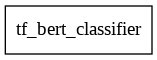

In [ ]:
#model structure visualization
from tensorflow import keras
from tensorflow.keras.utils import plot_model
keras.utils.plot_model(cls_model,show_shapes=True)

In [ ]:
#cls_model.save('/content/drive/MyDrive/data/bert_model_dr') -> 전체 모델 로드는 안됨,,,,,,,못쓰는듯

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data/bert_model_dr/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/data/bert_model_dr/assets


In [ ]:
import joblib
import torch
import math

In [ ]:
cls_model2.evaluate(val_inputs,val_data_labels)

782/782 [==============================] - 430s 546ms/step - loss: 0.0520 - accuracy: 0.9864


[0.051964227110147476, 0.9864400029182434]

In [ ]:
cls_model2.evaluate(test_inputs,test_data_labels)

In [ ]:
cls_model2.evaluate(test_inputs,test_data_labels)

782/782 [==============================] - 430s 550ms/step - loss: 0.0556 - accuracy: 0.9856


[0.055625297129154205, 0.9856399893760681]

In [ ]:
train_inputs

(array([[    2, 22176,  1296, ...,  4020,    17,     3],
        [    2,  1849, 28608, ..., 10052,  4057,     3],
        [    2,  2002,  4879, ...,  4196,  3435,     3],
        ...,
        [    2,  2941, 29079, ...,  4118,    20,     3],
        [    2, 20532,   809, ...,  8681,  8366,     3],
        [    2,   254, 18119, ..., 14818,  2005,     3]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]]))

In [ ]:
val_inputs

(array([[    2,  9072, 14245, ...,  9622,  9709,     3],
        [    2,  3354,    97, ...,  4009, 21064,     3],
        [    2, 16079,     6, ...,  4128,  9081,     3],
        ...,
        [    2, 10249,  4072, ...,  8565,  9850,     3],
        [    2,  1497,  4276, ...,  4465,  1571,     3],
        [    2, 10373, 11965, ..., 13574, 12194,     3]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]]))

In [ ]:
test_inputs

(array([[    2,     6,  9956, ...,  4160,  9956,     3],
        [    2,  8388, 26647, ..., 24102,  7971,     3],
        [    2,   598,  4131, ..., 15060,  8182,     3],
        ...,
        [    2, 12938,     6, ..., 12407,  4020,     3],
        [    2,  8175, 28310, ...,  4078,  8848,     3],
        [    2, 10941,  4793, ..., 13352, 11886,     3]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]]))

#  title과 body를 받아 레이블을 예측

In [ ]:
softmax = tf.keras.layers.Softmax()

In [ ]:
def preprocessing(premise,hypothesis):
  input_ids = []
  attention_masks = []
  token_type_ids = []

  input_id, attention_mask, token_type_id = bert_tokenizer_v2(premise, hypothesis, MAX_LEN)

  input_ids.append(input_id)
  attention_masks.append(attention_mask)
  token_type_ids.append(token_type_id)
    
  input_ids = np.array(input_ids, dtype=int)
  attention_masks = np.array(attention_masks, dtype=int)
  token_type_ids = np.array(token_type_ids, dtype=int)

  return input_ids,attention_masks,token_type_ids

In [ ]:
premise = ""
hypothesis = " "

In [ ]:
inputs = preprocessing(premise,hypothesis)

In [ ]:
logits = cls_model.predict(inputs)

In [ ]:
logits

array([[-1.2080498,  2.7899213]], dtype=float32)

In [ ]:
probs = softmax(logits)

In [ ]:
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

최종 예측 레이블 : [1]


# 검사

In [ ]:
logits = cls_model.predict(val_inputs)

In [ ]:
probs = softmax(logits)

In [ ]:
matrix = tf.math.argmax(probs, axis=-1).numpy()

In [ ]:
cnt = 0
for i in matrix:
  if i==1:
    cnt+=1

print(cnt)

12700


In [ ]:
val_result = val.copy()

In [ ]:
val_result['result'] = tf.math.argmax(probs, axis=-1).numpy()

In [ ]:
val_result['label & predict_label'] = ['same' if i==j else 'different' for i,j in zip(val_result['label'],val_result['result'])]
val_result

,id,title,body,category,label,result,label & predict_label
0,AKR20190715096400054,"광주세계수영 ""내 고향 광주를 전 세계에 알릴 수 있어 좋습니다""","""유학 중인 영국으로 돌아가서 내 고향 광주에서 세계대회가 열렸다고 말할 수 있어 ...",5,0,0,same
1,AKR20200729159800088,"한·일, WTO서 법리공방 본격화…수출규제 패널 설치 확정",미국의 함정 2척이 11일 중국이 영유권을 주장하는 남중국해 해역을 항해했다고 로이...,6,1,1,same
2,AKR20200814004751088,"WHO ""코로나19로 한 달에 444조원 경제적 손실""",수도권 최대 규모 코로나19 집단감염이 발생한 서울 구로구 신도림동 코리아빌딩 소재...,6,1,1,same
3,AKR20201022072100054,광주 공무원 1명이 주민 369명 담당…광역지자체 중 8번째 높아,광주 공무원 1명이 담당하는 주민 수가 많은 수준인 것으로 나타났다. 22일 국회 ...,7,0,0,same
4,AKR20190220151851063,대한상의 4차 산업혁명 인재 300명 양성…충청 5개 대학과 협약,전남도는 한국무역협회 광주전남지역본부와 함께 2020 전라남도 1차 중국 언택트 시...,2,1,1,same
...,...,...,...,...,...,...,...
24995,AKR20190608047200005,"""나르시시즘 빠진 86세대, 요즘 20대는 보수적 비판""",20대는 민주주의와 진보 진영 편에 서야 한다는 시각에는 1960년대에 태어나 19...,4,0,0,same
24996,AKR20200404060100053,안동서 코로나19 확진자 1명 추가…50명으로 늘어,송하진 전북지사가 12일 암이 집단 발병한 익산시 장점마을을 직접 찾아 주민들에게 ...,7,1,1,same
24997,AKR20191115174400082,홍콩서 獨 교환학생 2명 구금돼…시위 연관여부 아직,도널드 트럼프 미국 대통령이 올해 5~6월 두 차례 일본을 방문할 수 있도록 일정을...,6,1,1,same
24998,AKR20190108157400083,방중 北 김정은 인민대회당 도착…시진핑과 회담할 듯,"이스라엘 연립정부 구성의 마감 시한이 코앞으로 다가왔지만, 연정 협상이 난항을 겪고...",6,1,1,same


In [ ]:
cnt1 = 0
cnt2 = 0
for i in val_result['label & predict_label']:
  if i=='same':
    cnt1+=1
  else:
    cnt2+=1
print('정확히 예측: %d 개' %cnt1)
print('틀린 예측: %d 개' %cnt2)

정확히 예측: 24478 개
틀린 예측: 522 개


In [ ]:
logits = cls_model.predict(test_inputs)

In [ ]:
probs = softmax(logits)

In [ ]:
test_result = test.copy()

In [ ]:
test_result['result'] = tf.math.argmax(probs, axis=-1).numpy()

In [ ]:
test_result['label & predict_label'] = ['same' if i==j else 'different' for i,j in zip(test_result['label'],test_result['result'])]
test_result

,id,title,body,category,label,result,label & predict_label
0,AKR20201016074800062,"""관광 취약계층도 편하게"" 춘천시 열린 관광지 조성 마무리",강원 춘천시가 관광 취약계층도 편하게 관광지를 이용할 수 있는 열린 관광지 조성을 ...,7,0,0,same
1,AKR20191101111900054,"기자수첩 굶주림에 빵 훔친 30대, 외면하지 않은 우리 사회",LG전자가 장애를 가진 청소년들에게 정보통신기술을 매개로 세상과 소통할 수 있는 무...,7,1,1,same
2,AKR20190905075200003,"남부발전, 전력공기업 최초 美가스복합발전소 건설","한국자산관리공사는 오는 8∼10일 아파트, 주택 등 압류재산 709건을 공매한다고 ...",2,1,1,same
3,AKR20191114175100004,아파트 가스배관 공사중 작업자 3명 매몰…30여분만에 구조,북한이 건축물에 장애인 배려시설을 의무화한 법규를 채택했다고 조선중앙통신이 18일 ...,3,1,1,same
4,AKR20191113106300053,"""뇌물 받은 공무원 잘라야"" 허위사실 유포 50대 징역 6월",전북 전주시의 한 주민센터 사회복무요원이 폭로한 공직비리 및 일탈 의혹에 대한 경찰...,7,1,1,same
...,...,...,...,...,...,...,...
24995,AKR20201017047700061,"이재명 ""경기도는 이제 변방 아닌 대한민국의 확고한 중심""","이재명 경기도지사가 17일 경기도민의 날을 맞아 ""경기도는 더는 서울의 외곽이 아니...",7,0,0,same
24996,AKR20200928195100073,"아베 퇴임후 첫 공개석상 인사말 ""스가, 훌륭하게 뒤이었다""","아베 신조 전 일본 총리는 ""의원의 한명으로서 확실하게 정권을 떠받치고 싶다""며 스...",6,0,0,same
24997,AKR20190628095100054,"법원 ""빛가람혁신도시 개발부담금 660억원 부과 정당""",국세청의 연말정산 간소화 서비스가 15일 오전 8시 개통되면서 본격적으로 근로소득자...,7,1,1,same
24998,AKR20190718180800004,이번 토요일 북서울꿈의숲·경춘선숲길에 야외 물놀이장 개장,나눔경영 실천 김태명 리베라관광개발 회장에 표창 경남도는 28일 김경수 지사가 집...,3,1,1,same


In [ ]:
cnt1 = 0
cnt2 = 0
for i in test_result['label & predict_label']:
  if i=='same':
    cnt1+=1
  else:
    cnt2+=1
print('정확히 예측: %d 개' %cnt1)
print('틀린 예측: %d 개' %cnt2)

정확히 예측: 24477 개
틀린 예측: 523 개
